# Baseball Case Study

## Data Description

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors


-- Output: Number of predicted wins (W)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


import warnings
warnings.filterwarnings('ignore')


## Loading the Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [4]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [5]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
# Statistical summary
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [7]:
#dimension of the dataset
df.shape

(30, 17)

In [8]:
#Checking the null values of the dataset
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

* All values are '0'. it is clear that  there is no null values in the dataset

Now we are going to plot a heatmap to show the absense of null values

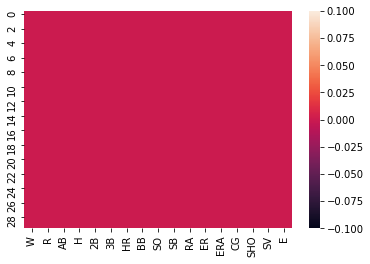

In [9]:
sns.heatmap(df.isnull())

* From the heatmap also it is clear that there is no null values in the dataset

Now we are going to check the value counts of the target column 'Earned Run Average'.

In [10]:
df['W'].value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

## Data Visualization

### Univariate analysis

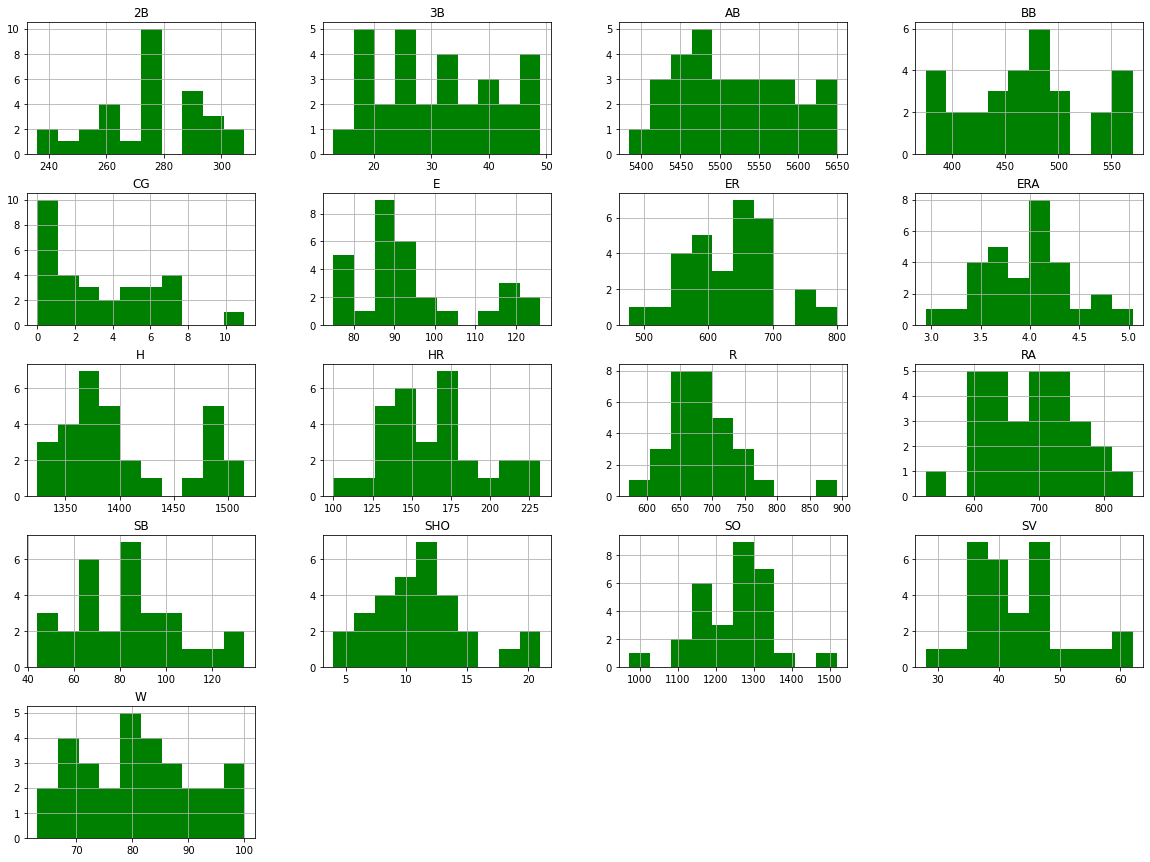

In [11]:
df.hist(figsize=(20,15),color='g')
plt.show()

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'histogram of wins')

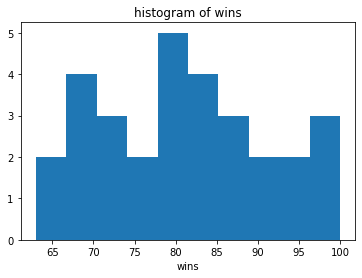

In [13]:
plt.hist(df['W'])
plt.xlabel('wins')
plt.title('histogram of wins')

* The maximum number of wins is 5, between the range 78-81(78->1,79->1,80->1,81->2).The minimum number of win is 2,it is at the bins 63-67(63->1,64->1),75,90 and 95.

In [14]:
df['W'].mean()

80.96666666666667

Now for classification we are going to create win label column

In [15]:
#Create bins for each column values
def  assign_win_bins(W):
    if W<70:
        return 1
    if W>=70 and W<=80:
        return 2
    if W>=81 and W<=90:
        return 3
    if W>=91:
        return 4
    


In [16]:
#apply to the win column
df['win_bins']=df['W'].apply(assign_win_bins)

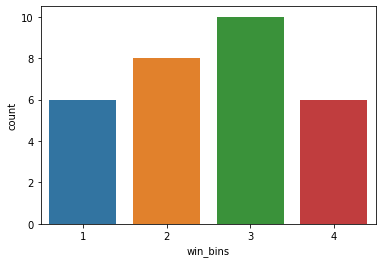

In [17]:
sns.countplot(df['win_bins'])

* from the above graph we can infer that in the bin 3, team achieved maximum number of win ie,10. 

### Bivariate Analysis

In [20]:
var=['R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']
def plotbargraph(var):
    
    sns.set(font_scale=1)
    plt.figure(figsize=(15,8))
    ax = sns.barplot(x=var, y='win_bins', data=df)

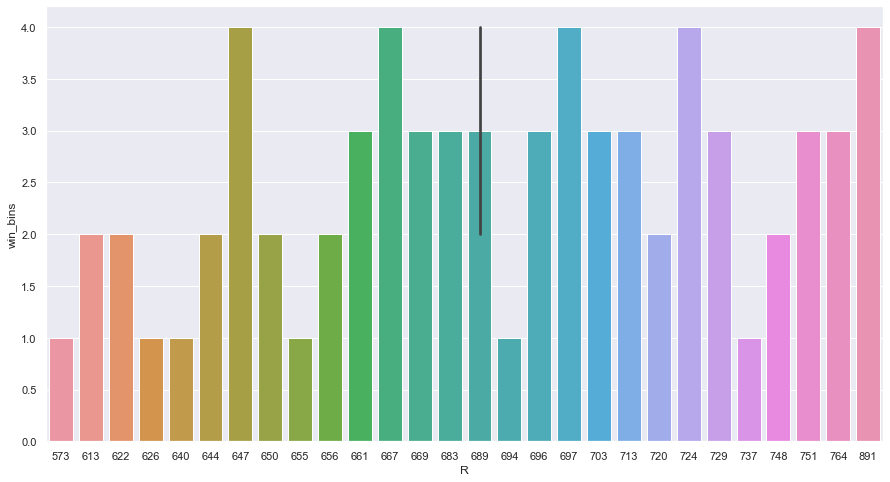

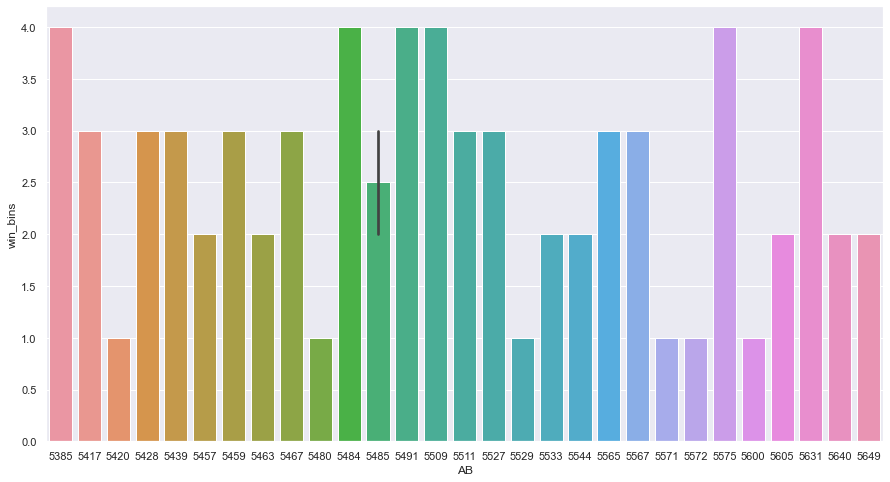

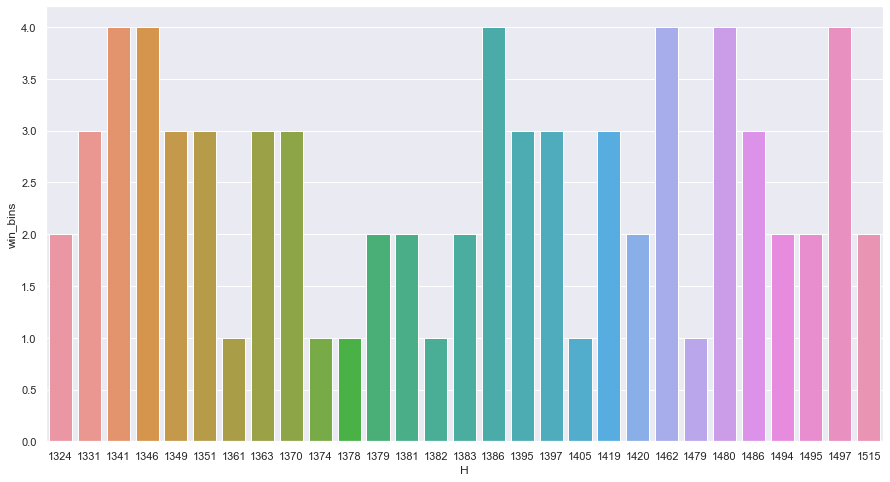

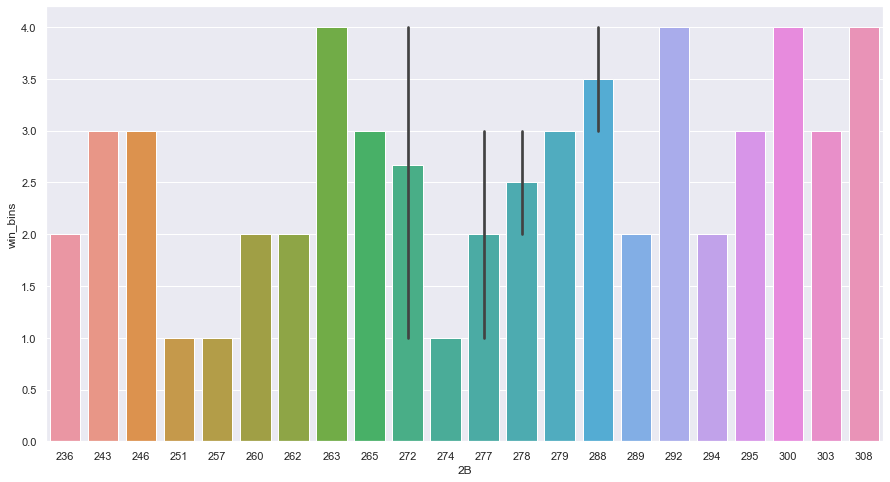

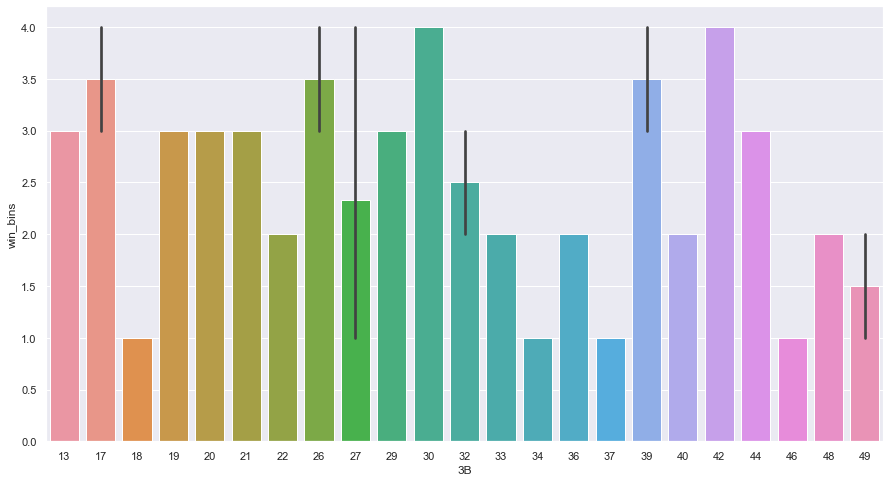

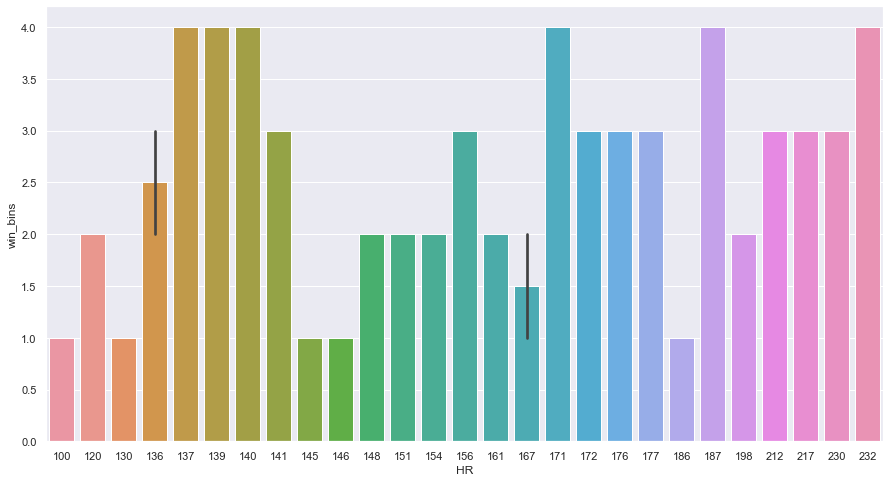

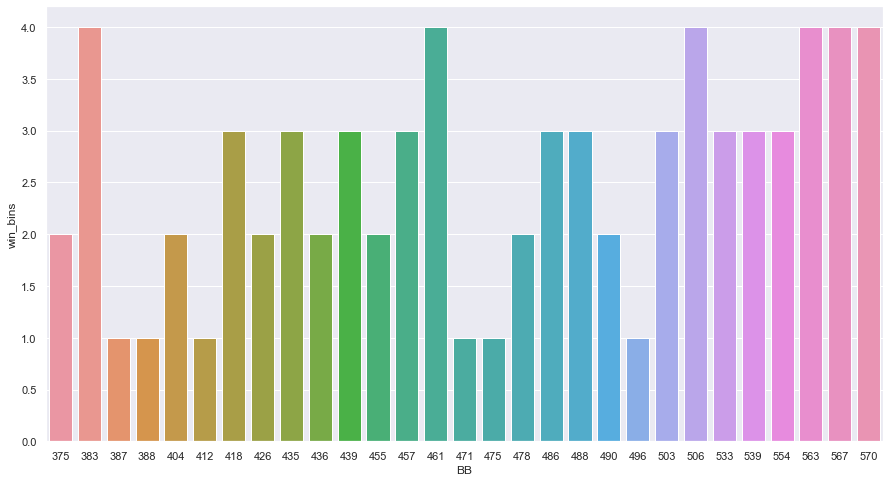

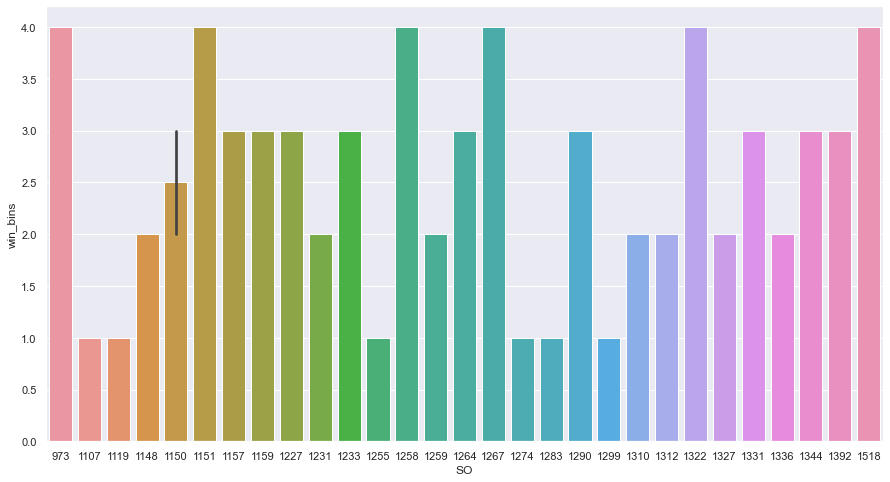

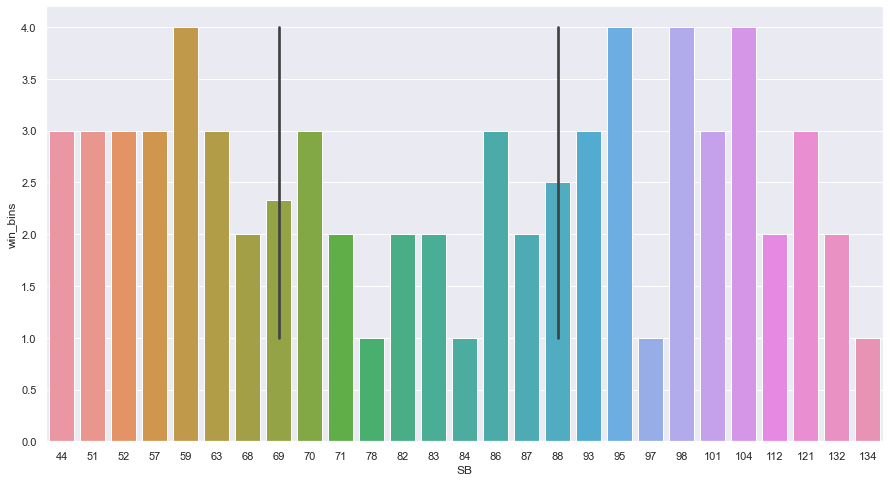

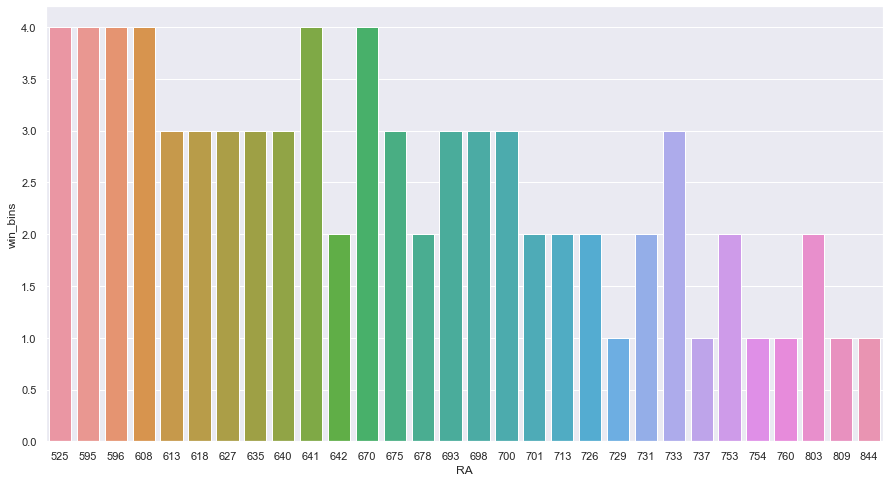

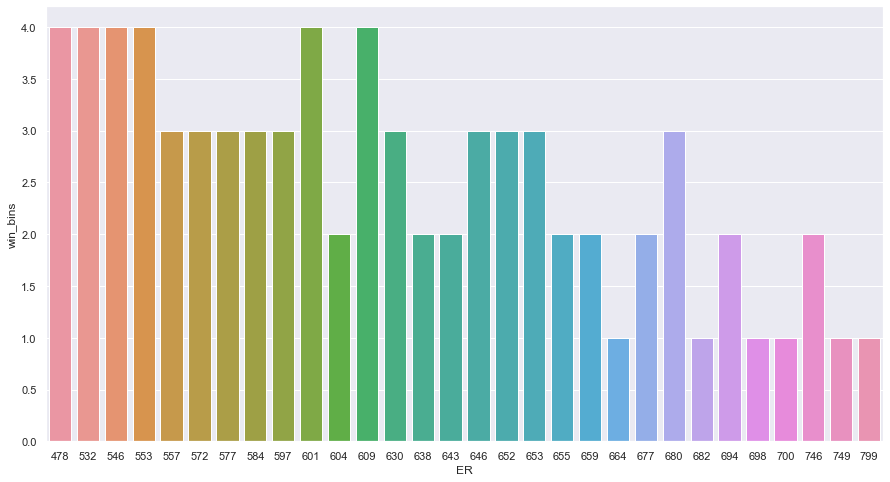

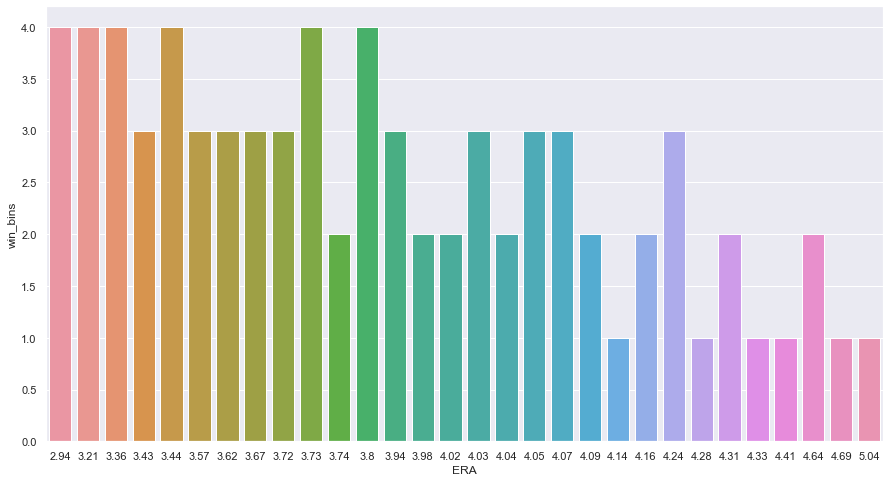

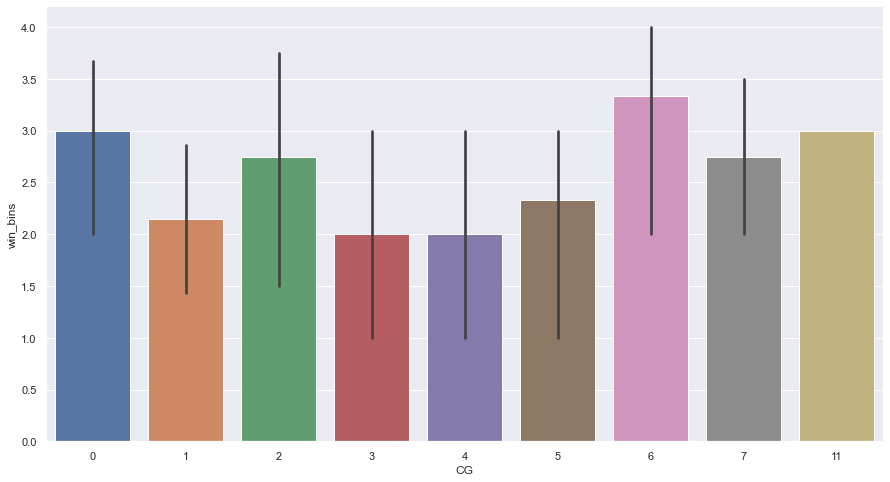

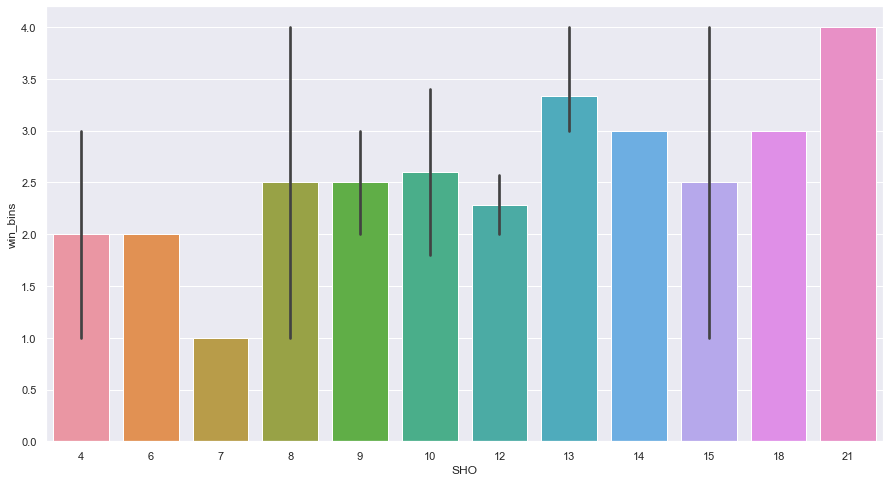

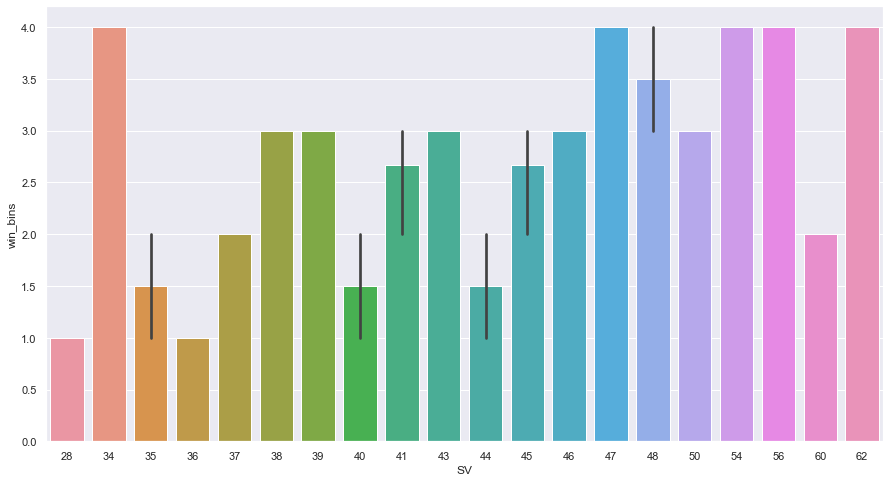

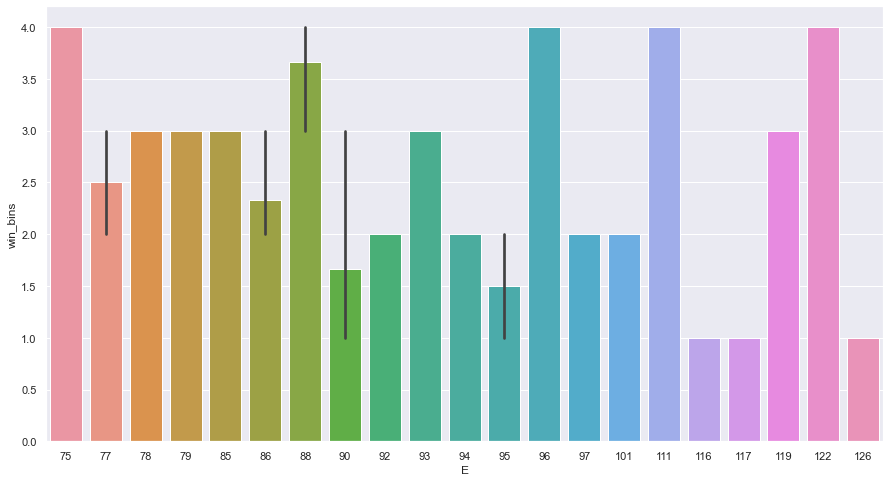

In [21]:
for i in var:
    plotbargraph(i)

### Conclusions from the graph

* R:-  At the scores 647,661,697,724,891 win_bin is 4.that means wins grater than 91.

* AB :- For the values 5385,5484,5491,5509,5575,5631 win is maximum. for these values  wins are greater than or equal to 91.i.e; wins ranges between 91-100. Minimum at the values 5420,5480,5529,5571,5572,5600. That means wins<70.

* H :- Win is maximum at 1341,1346,1386,1462,1480,1497. for these values wins between 91 and 100.
    minimum at 1361,1374,1378,1382,1405,1479. for these values wins between 63 and 70.

* 2B :- at the values 263,292,300,308 wins are maximum.ie; between 91 and 100.

* 3B :- Wins are maximum at values 29 and 42. for these values wins ranges between 91 to 100.

* HR :-  At the values of HR 137,139,140,171,187,232 win is maximum between the range 91 and 100.Win is minimum at the values 100,130,145,146,186 lies in the range 63 and 70.

* BB :- At the values of BB 383,461,506,563,567,570 win is maximum lies in the range 91 to 100. win is minimum at the values 387,388,412,471,475,496.

 * SB :- win is maximum at the values 59,95,98,104.win is minimum at only 4 values of SB 78,84,97,134.


* RA :- at the RA values 525,595,596,609,641,670 win is maximum.


### Multivariate Analysis

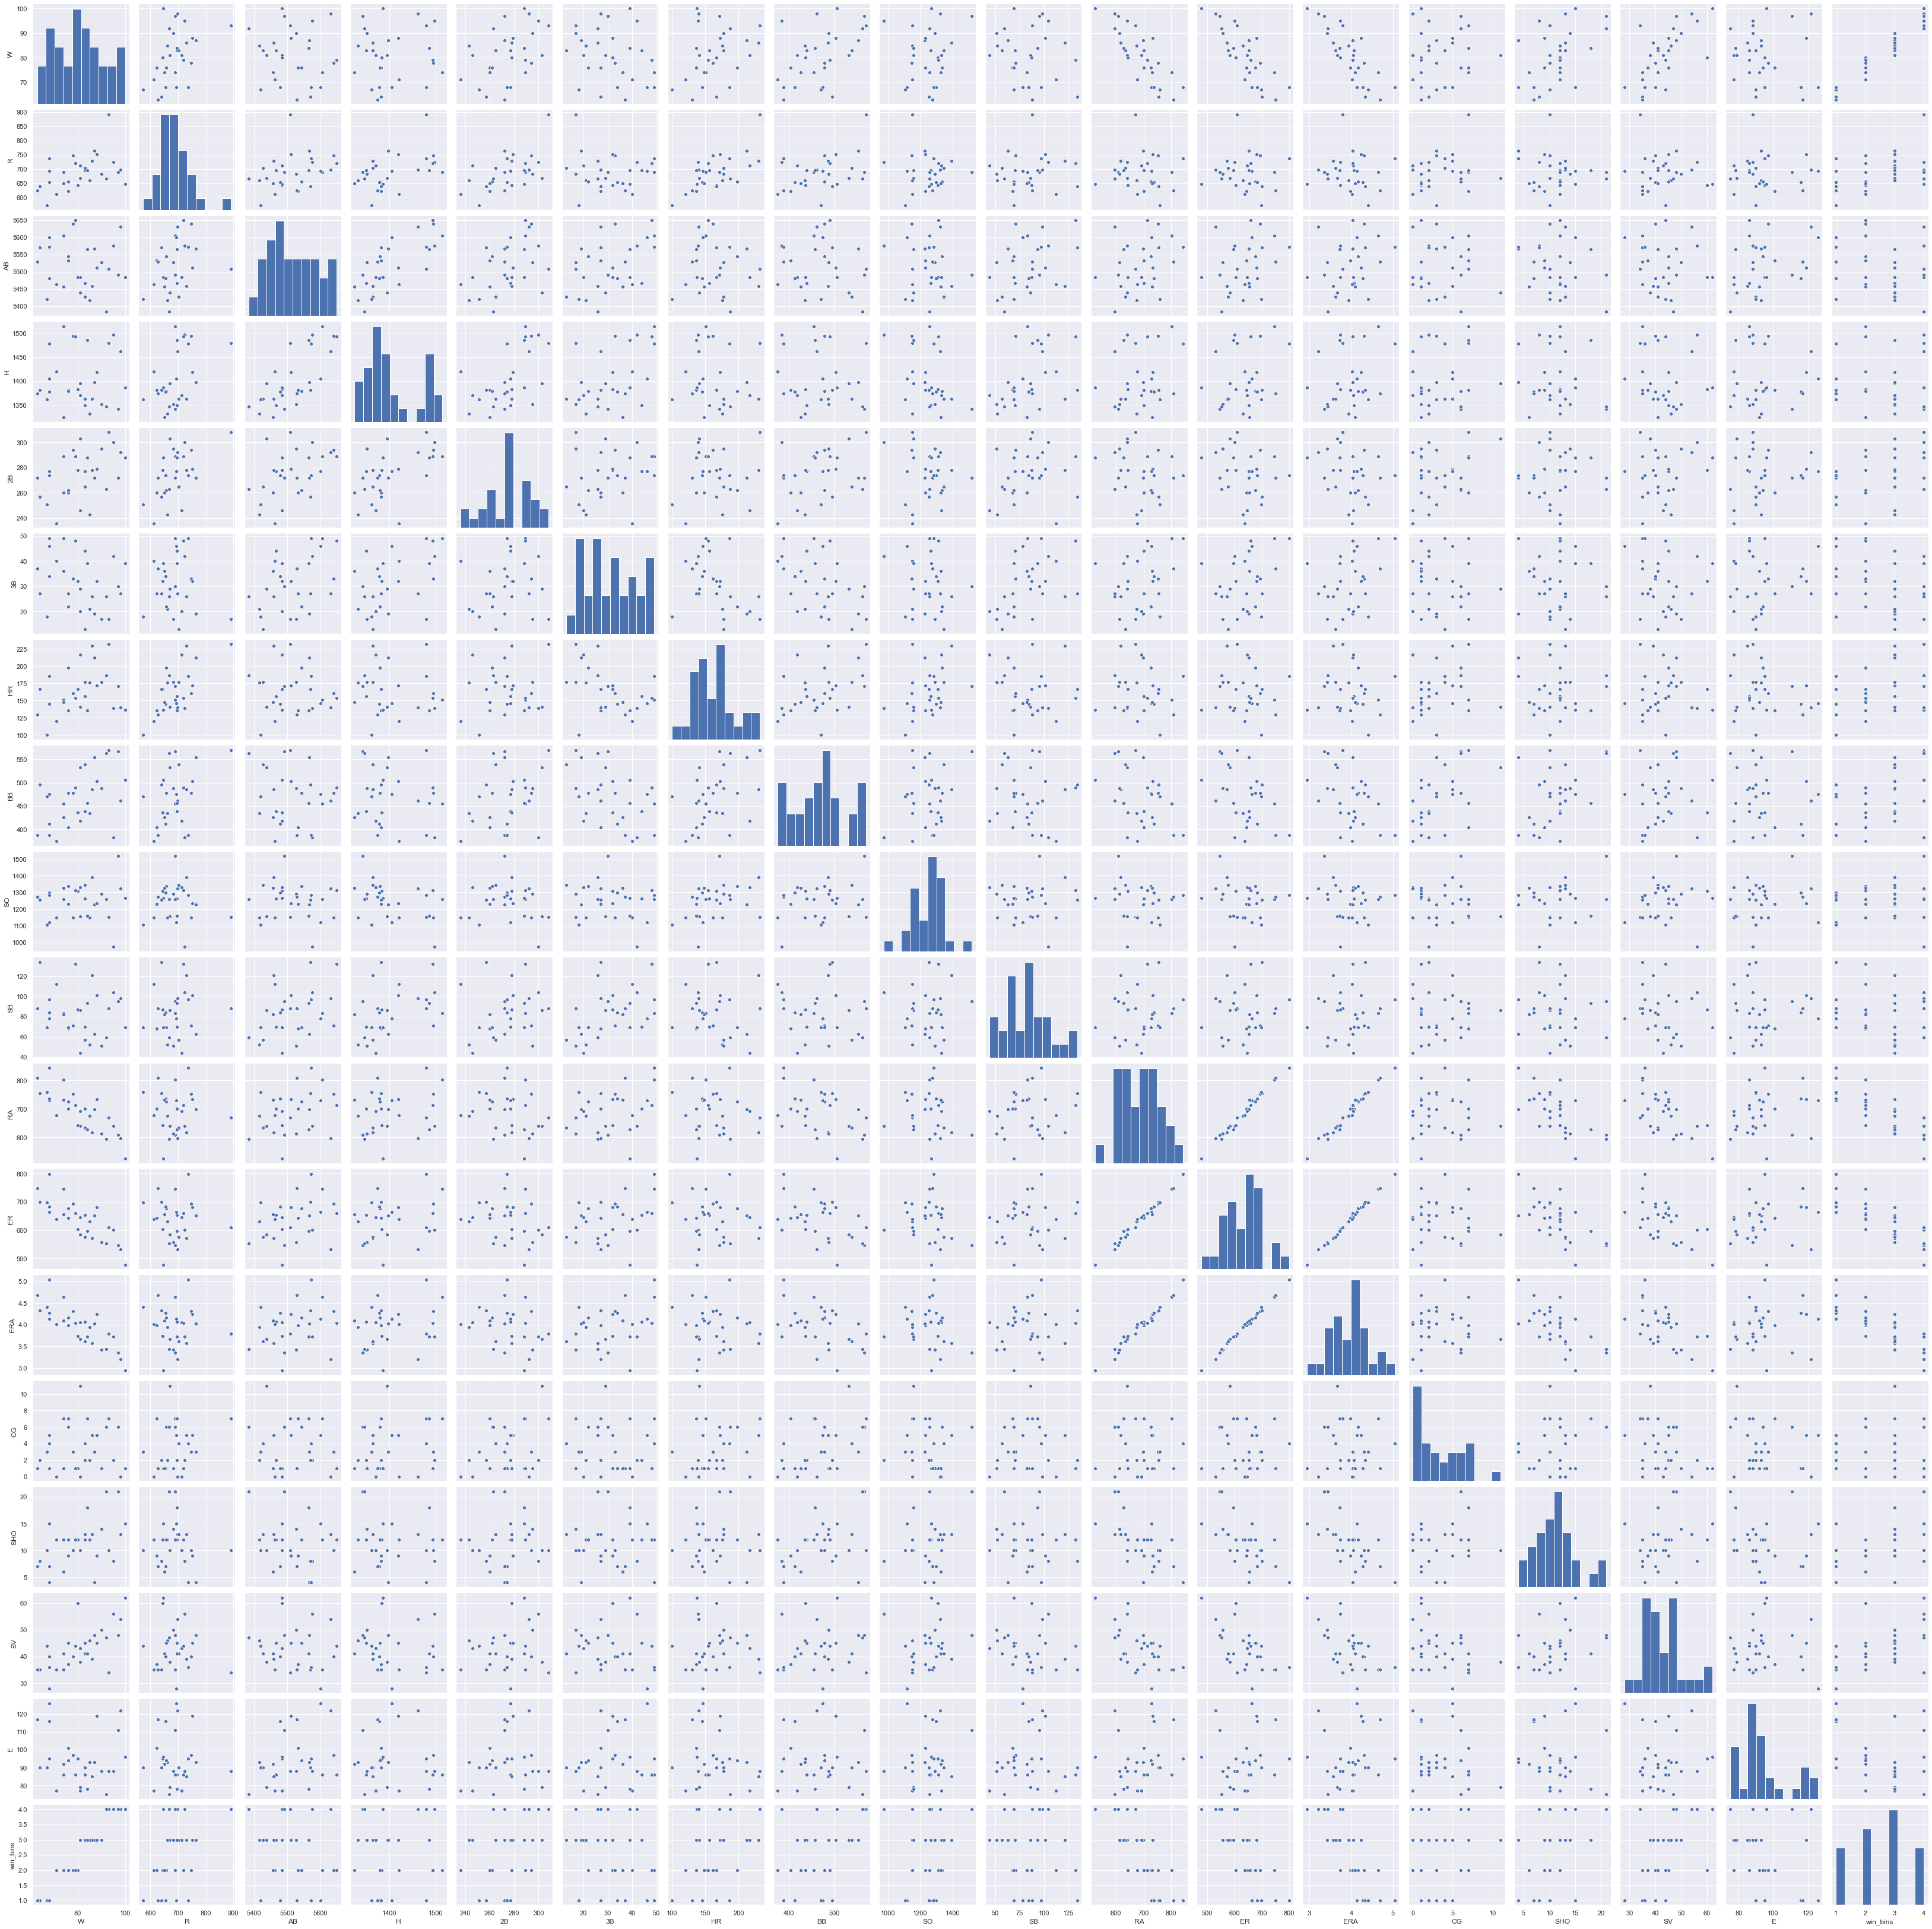

In [22]:
sns.pairplot(df)
plt.show()

## Checking Correlation

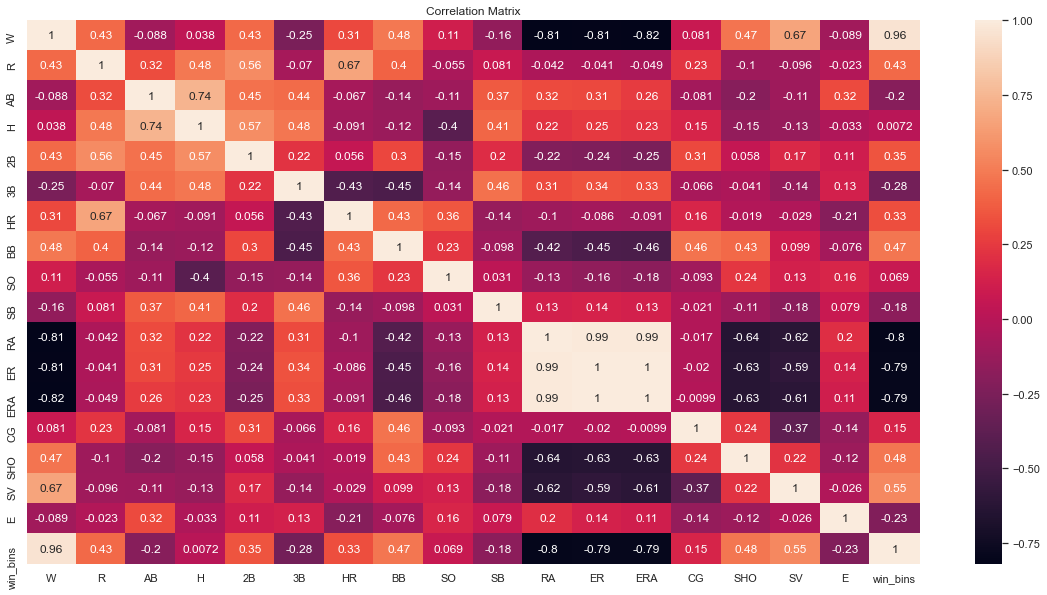

In [23]:
corr_matrix=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation Matrix")
plt.show()

* From the above plot it is clear that win_bin have strong correlation with R, 2B, HR, BB, SHO, SV.

Now we are going to drop 2 columns 'H' and 'SO',since it has lower correlaton with the target variable.

In [24]:
df.drop("H",axis=1,inplace=True)
df.drop("SO",axis=1,inplace=True)

In [25]:
#Seperating independent and Target variable in x and y
x=df.drop('win_bins',axis=1)
y=df['win_bins']

## Checking Skewness

### Distribution of data among all columns

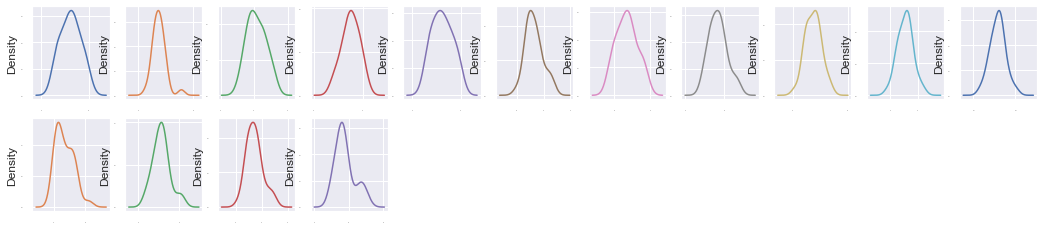

In [26]:
x.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

* We can observe that some column are skewed.

In [27]:
x.skew()

W      0.047089
R      1.200786
AB     0.183437
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

* In the columns R,CG,SV and E skewness is present,since the corresponding values are greater than 0.5

Now we are going to remove these skewness by using power_transform function.

### Removing Skewness

In [28]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [29]:
df_new.skew()

W     -0.027204
R      0.000000
AB     0.000000
2B    -0.035315
3B    -0.072933
HR    -0.000065
BB    -0.007760
SB    -0.010455
RA    -0.008082
ER    -0.001940
ERA    0.001746
CG    -0.059785
SHO    0.006560
SV     0.000836
E      0.063909
dtype: float64

All the skewness are removed

In [30]:
x=df_new

In [31]:
x.head()

,W,R,AB,2B,3B,HR,BB,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.346947,0.0,0.0,1.477685,1.033103,-0.764626,-1.610915,0.939708,-0.660331,-0.497425,-0.500893,-0.359844,-0.789579,1.546378,-0.334953
1,0.218658,0.0,0.0,0.084269,1.203320,-0.158581,-0.502749,-0.539693,0.175465,0.257974,0.261806,-0.359844,0.251775,0.360444,-0.532211
2,0.025271,0.0,0.0,1.670782,-0.160270,-0.689676,1.128294,0.211956,-0.674621,-0.746906,-0.636459,1.993513,-0.245393,-0.607594,-1.342331
3,-0.465574,0.0,0.0,-0.848600,-0.360521,-0.879049,-1.181207,-0.642564,0.189512,0.113575,0.060804,1.220103,-0.510759,-0.764453,0.678524
4,-0.665017,0.0,0.0,0.792183,1.616444,-0.329850,-0.206771,0.079629,1.603228,1.582654,1.520959,1.220103,0.251775,-1.095010,-0.532211


In [32]:
y

0     4
1     3
2     3
3     2
4     2
5     4
6     3
7     3
8     2
9     2
10    3
11    3
12    3
13    2
14    1
15    4
16    4
17    4
18    1
19    1
20    3
21    3
22    2
23    1
24    1
25    4
26    3
27    2
28    2
29    1
Name: win_bins, dtype: int64

### Checking Outliers

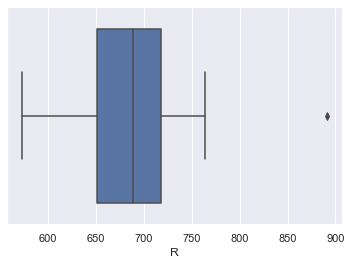

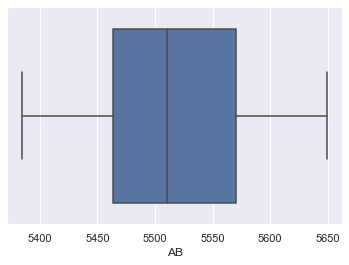

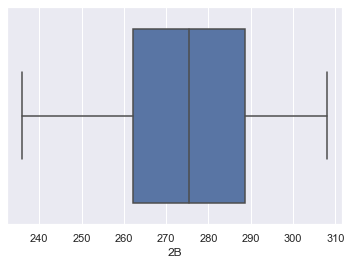

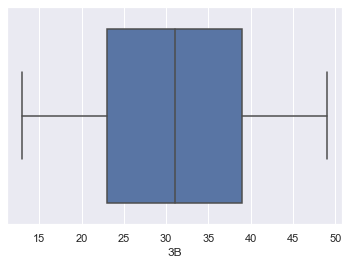

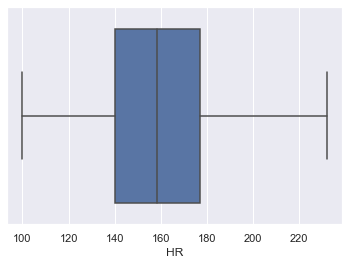

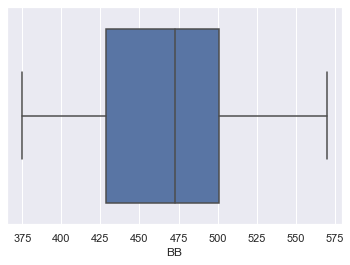

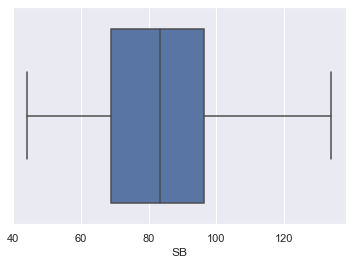

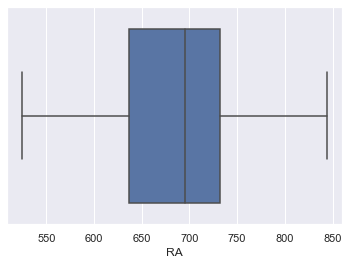

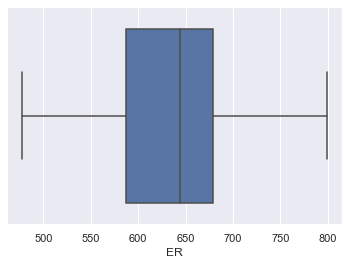

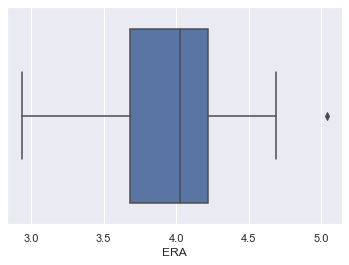

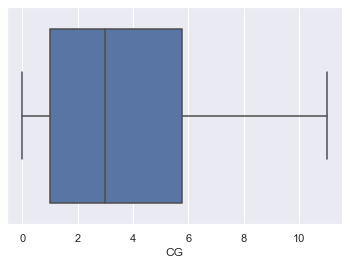

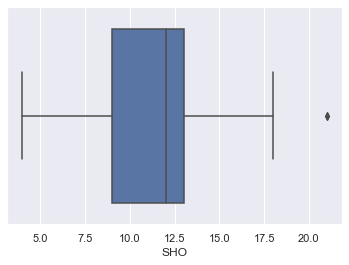

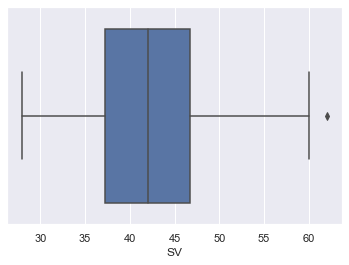

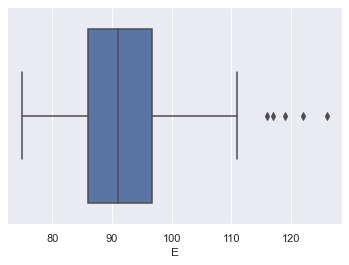

In [33]:
           
for i in ['R','AB','2B','3B','HR','BB','SB','RA','ER','ERA','CG','SHO','SV','E']:
    
    sns.boxplot(df[i])
    plt.show()


There are no considerable outliers in the dataset

## Scaling the data using StandardScaler

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [36]:
x

array([[ 1.34694657,  0.        ,  0.        ,  1.47768528,  1.03310301,
        -0.76462586, -1.61091476,  0.93970819, -0.66033096, -0.49742469,
        -0.50089346, -0.35984364, -0.78957937,  1.546378  , -0.3349525 ],
       [ 0.21865782,  0.        ,  0.        ,  0.08426878,  1.2033202 ,
        -0.15858141, -0.50274883, -0.53969308,  0.17546536,  0.25797351,
         0.26180619, -0.35984364,  0.25177537,  0.36044386, -0.53221128],
       [ 0.02527078,  0.        ,  0.        ,  1.67078208, -0.16026987,
        -0.68967629,  1.1282937 ,  0.2119555 , -0.67462053, -0.74690639,
        -0.63645949,  1.99351257, -0.24539345, -0.6075936 , -1.34233137],
       [-0.46557388,  0.        ,  0.        , -0.84859969, -0.36052064,
        -0.8790486 , -1.18120722, -0.64256433,  0.18951225,  0.11357524,
         0.06080381,  1.22010317, -0.51075929, -0.76445333,  0.67852361],
       [-0.6650169 ,  0.        ,  0.        ,  0.79218291,  1.61644394,
        -0.3298501 , -0.20677062,  0.07962852, 

## Best random State

In [37]:
maxAccu=0
maxRS=0
for i in range(1,400):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)        

Best accuracy is 0.7777777777777778 on Random_state 176


## Creating train_test split

In [38]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((21, 15), (9, 15), (21,), (9,))

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=176)

In [40]:
model=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('For',m,':')
    print('Accuracy Score:',accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

For LogisticRegression() :
Accuracy Score: 0.7777777777777778
[[2 0 0 0]
 [0 2 0 0]
 [0 2 2 0]
 [0 0 0 1]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         2
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00         1

    accuracy                           0.78         9
   macro avg       0.88      0.88      0.83         9
weighted avg       0.89      0.78      0.78         9



For DecisionTreeClassifier() :
Accuracy Score: 1.0
[[2 0 0 0]
 [0 2 0 0]
 [0 0 4 0]
 [0 0 0 1]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00 

## Cross Validation

In [41]:
for m in model:
    scr=cross_val_score(m,x,y,cv=5)
    print('Cross validation score of',m,'is:')
    print('Score',scr)
    print('Cross validation score',scr.mean())
    print('Standard deviation',scr.std())
    print('\n')

Cross validation score of LogisticRegression() is:
Score [0.16666667 0.33333333 0.16666667 0.33333333 0.5       ]
Cross validation score 0.3
Standard deviation 0.12472191289246472


Cross validation score of DecisionTreeClassifier() is:
Score [0.66666667 0.83333333 1.         0.83333333 1.        ]
Cross validation score 0.8666666666666668
Standard deviation 0.12472191289246472


Cross validation score of RandomForestClassifier() is:
Score [0.33333333 0.5        0.83333333 0.83333333 1.        ]
Cross validation score 0.7
Standard deviation 0.24494897427831783


Cross validation score of GradientBoostingClassifier() is:
Score [0.66666667 0.83333333 1.         0.83333333 1.        ]
Cross validation score 0.8666666666666668
Standard deviation 0.12472191289246472




#### Best model is 'GradientBoostingClassifier',since the  difference between the accuracy score and cross validation score is minimum.

## Hyperparameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
#Creating parameter list to pass in GridsearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2'],'max_depth':[1,10]}

In [59]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [60]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [1, 10],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [61]:
GCV.best_params_

{'criterion': 'mae', 'max_depth': 1, 'max_features': 'auto'}

In [62]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [63]:
accuracy_score(y_test,GCV_pred)

1.0

## Saving Best model

In [64]:
import pickle
filename="baseballwin.pkl"
pickle.dump(GCV.best_estimator_,open(filename,'wb'))

## Conclusion

In [65]:
loaded_model=pickle.load(open('baseballwin.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

1.0


In [66]:
import numpy as np
a=np.array(y_test)
predicted=np.array(GCV.best_estimator_.predict(x_test))
df_con=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))

In [67]:
df_con

,Original,Predicted
0,1,1
1,3,3
2,2,2
3,1,1
4,3,3
5,3,3
6,3,3
7,4,4
8,2,2
